# **Classificador de Exoplanetas por Tipos**

## Objetivo
Este código tem como objetivo classificar exoplanetas com base em características fornecidas pelo dataset da NASA.

## ***Estrutura do Código***

### 1. Importação de Bibliotecas
- Utilizei pandas, numpy, matplotlib, seaborn e sklearn para este projeto.

### 2. Carregamento de Dados
- Carreguei o dataset da NASA Exoplanets disponível em [link do dataset](https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets).
- **Quantidade de instâncias:** 5250
- **Quantidade de atributos:** 13

### 3. Pré-Processamento
- Normalização dos dados.
- Lidar com valores ausentes.
- Divisão do conjunto de dados em treino e teste.

### 4. Treinamento do Modelo
- Utilizei o algoritmo de classificação RandomForestClassifier para treinar o modelo.

### 5. Avaliação
- Avaliei o desempenho do modelo usando métricas como precisão, recall e matriz de confusão.

---

# Importando Bibliotecas

Nesta seção, são importadas as bibliotecas necessárias para o desenvolvimento do classificador de exoplanetas.

- `pandas`: Para manipulação e análise de dados.
- `numpy`: Para operações numéricas e manipulação de arrays.
- `matplotlib.pyplot`: Para visualização de dados.
- `seaborn`: Biblioteca complementar para visualização estatística.

Além disso, as seguintes classes e métodos do `sklearn` foram importados para a construção e avaliação do modelo de classificação:

- `RandomForestClassifier`: Algoritmo de classificação baseado em árvores de decisão.
- `export_graphviz`: Para visualização das árvores de decisão geradas pelo modelo.
- `train_test_split`: Divisão do dataset em conjuntos de treino e teste.
- `accuracy_score`: Métrica para avaliar a acurácia do modelo.
- `classification_report`: Relatório com métricas de classificação.
- `confusion_matrix` e `ConfusionMatrixDisplay`: Para visualizar a matriz de confusão.
- `LabelEncoder`: Para codificar variáveis categóricas.
- `StandardScaler`: Para padronização de features.
- `SimpleImputer`: Para lidar com valores ausentes no dataset.


In [1]:
# Importando Bibliotecas

# Bibliotecas Gerais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# Carregamento de Dados

Nesta seção, carregamos os dados do arquivo CSV 'cleaned_5250.csv' em um DataFrame do pandas. Em seguida, imprimimos informações iniciais sobre o DataFrame:

- Quantidade de instâncias (linhas) e quantidade de atributos (colunas).
- Mostramos as primeiras linhas do DataFrame para visualizar a estrutura dos dados.

In [2]:
# Carregando dados do arquivo 'cleaned_5250.csv' para um DataFrame
df = pd.read_csv('cleaned_5250.csv')

# Imprimindo informações iniciais do DataFrame
num_instancias, num_atributos = len(df), len(df.columns)
print(f'Quantidade de instâncias: {num_instancias}\nQuantidade de atributos: {num_atributos}\n')

# Removendo linhas com valores ausentes (NaN)
df.dropna(axis=0, inplace=True)

# Resetando o índice após a remoção de linhas
df.reset_index(inplace=True)
df.head()

Quantidade de instâncias: 5250
Quantidade de atributos: 13



,index,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


# Pré-Processamento - Verificação de Valores Nulos

Nesta etapa, verificamos a quantidade de valores nulos em cada coluna do DataFrame usando o método `isnull().sum()`. Isso nos fornece informações sobre a presença de dados ausentes em cada atributo, o que é crucial para o pré-processamento dos dados.

In [3]:
# Verificando valores nulos
missing_values = df.isnull().sum()
missing_values

index                0
name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
mass_multiplier      0
mass_wrt             0
radius_multiplier    0
radius_wrt           0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
dtype: int64

# Preparação dos Dados

- Nesta etapa, selecionamos os atributos desejados do DataFrame 'df' para serem utilizados no processo de treinamento do modelo. Em seguida, verificamos e codificamos variáveis categóricas, se presentes, utilizando a técnica de 'get_dummies' do pandas para converter variáveis categóricas em colunas numéricas, garantindo que os dados estejam prontos para o treinamento do modelo de machine learning.


In [4]:
# Carregar o DataFrame 'df' com os dados
features = ["distance", "stellar_magnitude", "mass_multiplier", "radius_multiplier", "orbital_radius", "orbital_period", "eccentricity"]

# Selecionar os atributos/features
X = df[features]

# Codificar variáveis categóricas, se existirem
for col in X.columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
        X = pd.get_dummies(X, columns=[col])

# Divisão dos Dados

Nesta etapa, o conjunto de dados é dividido em conjuntos de treinamento e teste (X_train, X_test, y_train, y_test) utilizando a função `train_test_split` do sklearn. Essa divisão é essencial para garantir que o modelo seja treinado em uma porção dos dados e avaliado em outra, contribuindo para uma avaliação mais robusta de seu desempenho.


In [5]:
# Separar o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, df["planet_type"], test_size=0.25)

# Treinamento e Avaliação do Modelo

- Nesta etapa, instanciamos e treinamos um modelo de Random Forest com 100 estimadores (árvores). Utilizamos os dados de treinamento imputados para treinar o modelo. Em seguida, avaliamos o modelo, realizando previsões no conjunto de teste e imprimindo um relatório de classificação utilizando `classification_report` do sklearn. Isso nos fornece métricas como precisão, recall, e f1-score para avaliar o desempenho do modelo.


In [6]:

# Instanciar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100)

# Treinar o modelo com os dados de treinamento imputados
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Gas Giant       0.93      0.94      0.93       359
Neptune-like       0.98      0.99      0.98       413
 Super Earth       0.95      0.94      0.94       366
 Terrestrial       0.89      0.78      0.83        54

    accuracy                           0.95      1192
   macro avg       0.94      0.91      0.92      1192
weighted avg       0.95      0.95      0.95      1192



**Visualização de Árvores de Decisão:**

Nesta etapa, visualizamos as árvores de decisão geradas pelo modelo. Cada árvore representa o processo de tomada de decisão para classificar exoplanetas com base nas características fornecidas. A coloração nas folhas da árvore indica a classe atribuída, e os ramos representam as condições de divisão com base nas características.

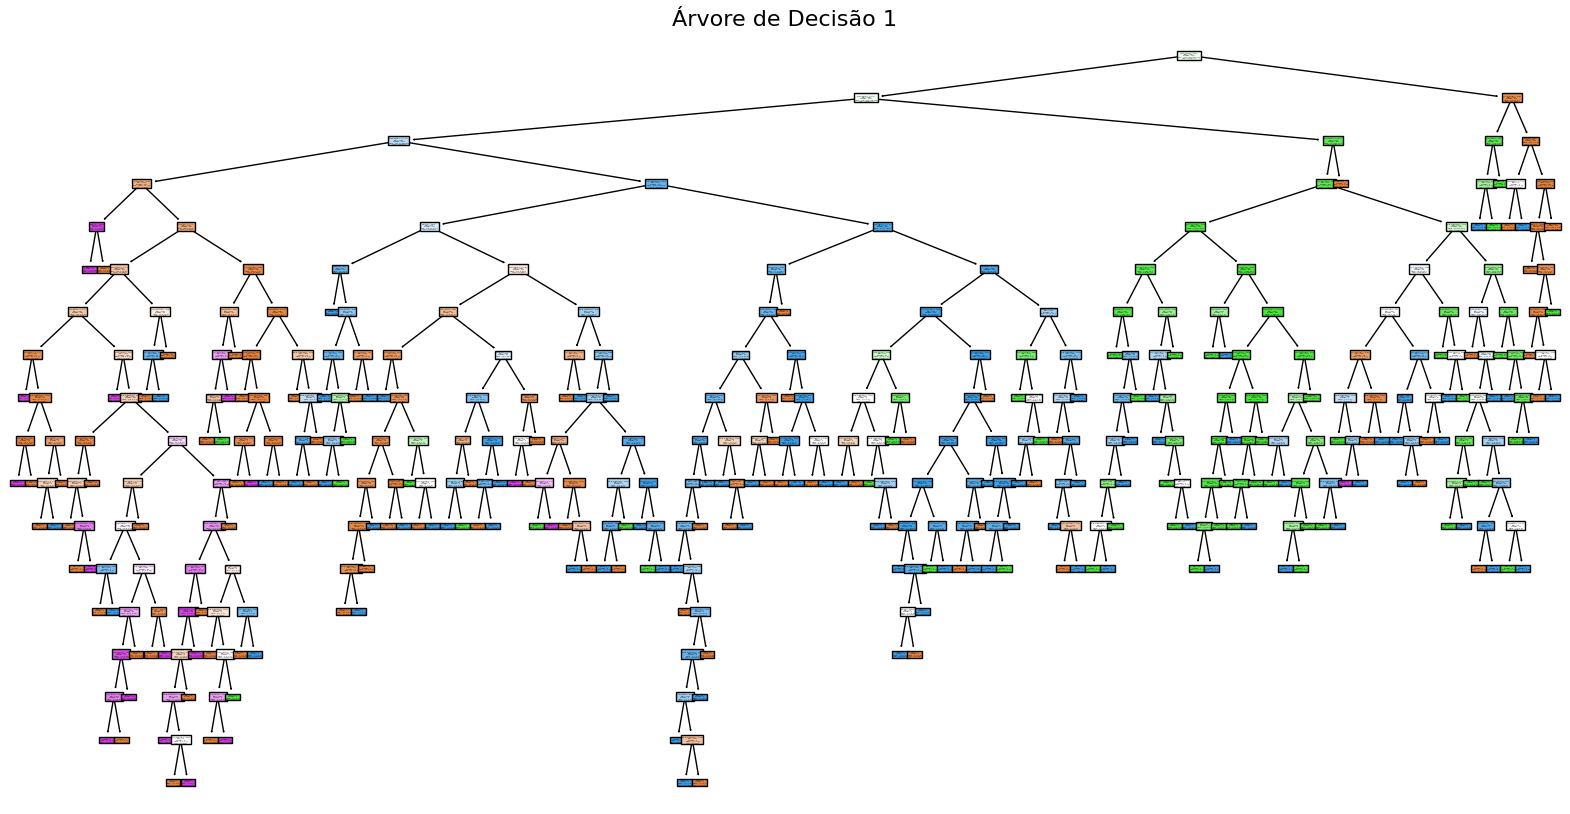

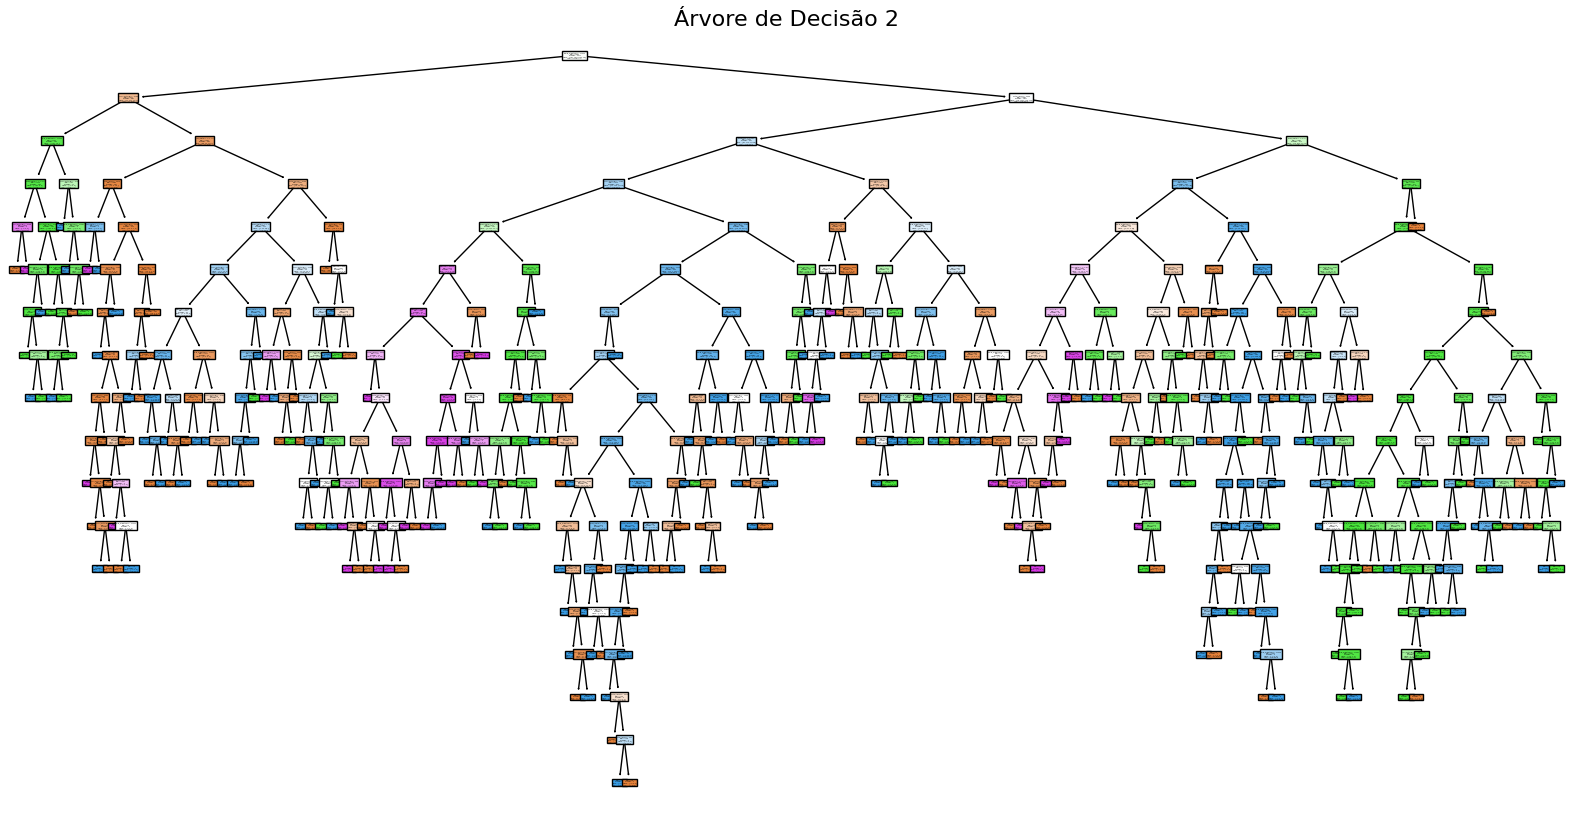

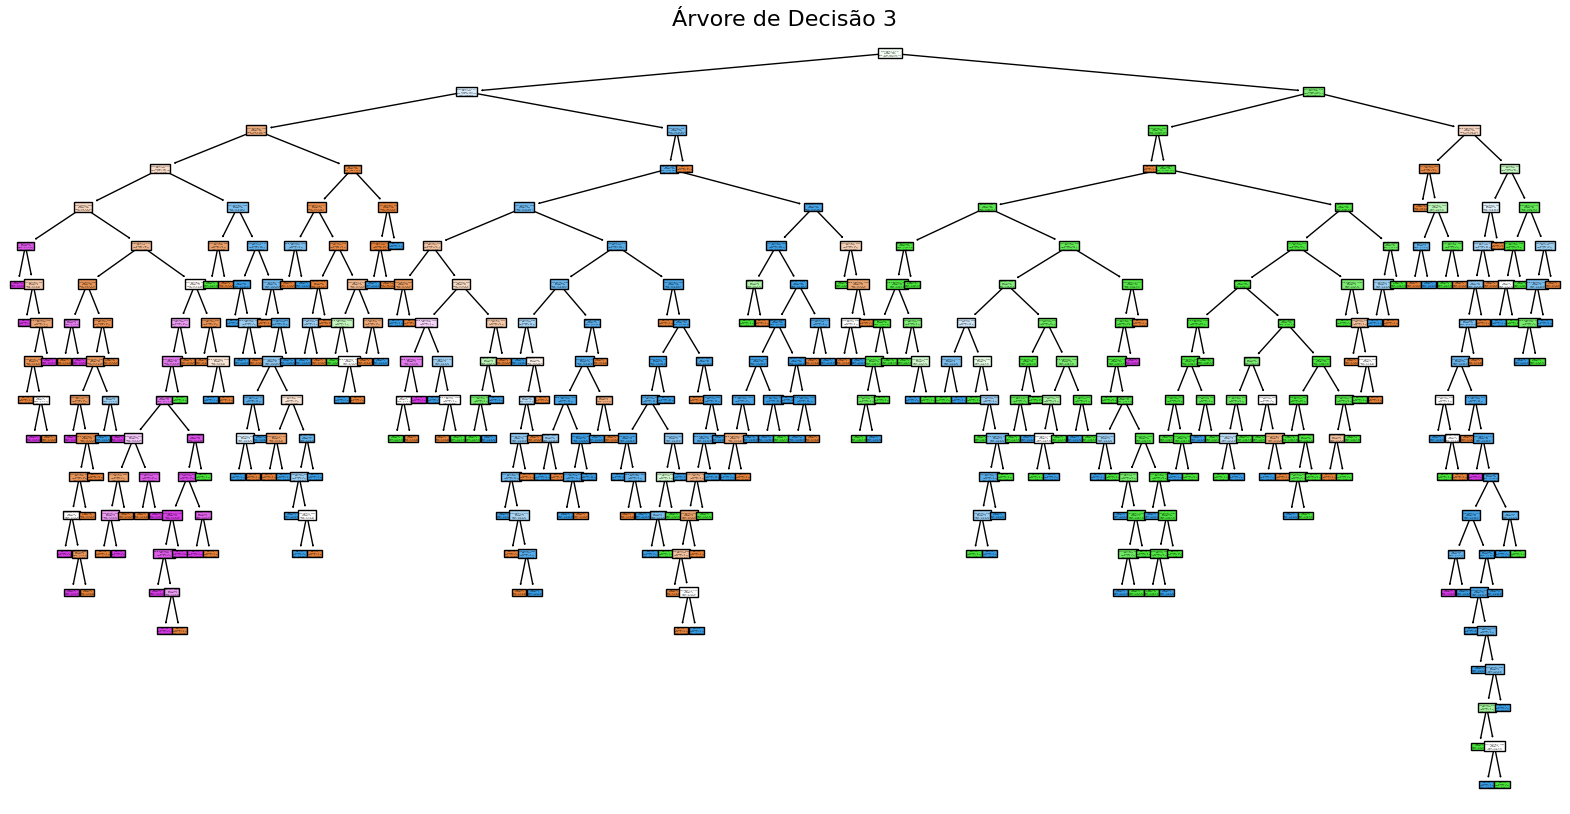

In [7]:
# Número máximo de níveis na árvore
max_levels = 3

for i in range(min(len(model.estimators_), max_levels)):
    # Configurar e exibir a árvore de decisão
    plt.figure(figsize=(20, 10))
    plot_tree(model.estimators_[i], filled=True, feature_names=X.columns, class_names=model.classes_)

    # Adicionar título e detalhes
    plt.title(f'Árvore de Decisão {i+1}', fontsize=16)
    plt.xlabel("Características Importantes", fontsize=14)
    plt.ylabel("Classes", fontsize=14)

    # Exibir a árvore
    plt.show()


# Análise da Importância das Features

- Nesta etapa, calculamos a importância das features no modelo treinado utilizando a Random Forest e plotamos um gráfico de barras horizontal para visualizar essa importância. Isso nos permite identificar as features mais relevantes para a classificação dos exoplanetas, ajudando na compreensão do impacto de cada atributo no modelo.


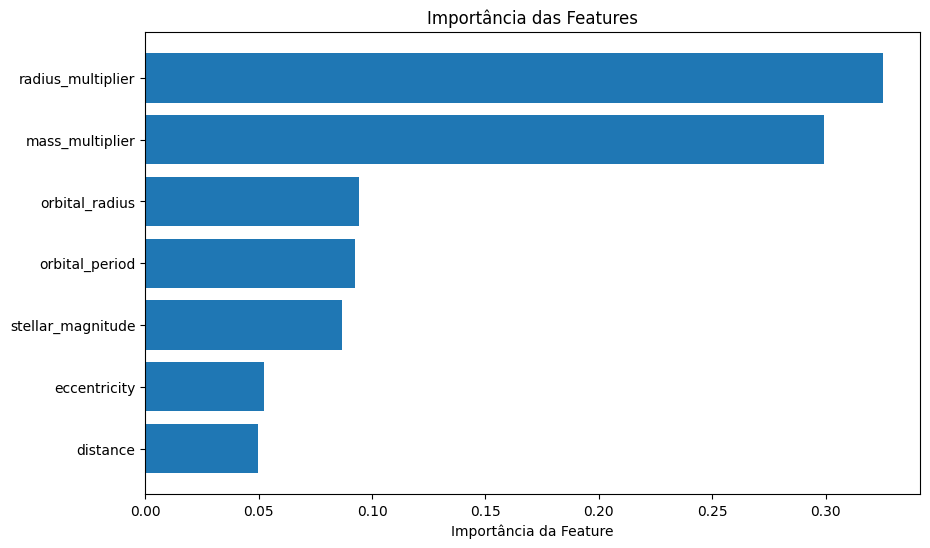

In [8]:
# Importância das features
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(features)[sorted_idx])
plt.xlabel('Importância da Feature')
plt.title('Importância das Features')
plt.show()


# Matriz de Confusão

- Nesta etapa, geramos e exibimos a matriz de confusão, uma representação visual que mostra a qualidade das previsões do modelo. Utilizamos `confusion_matrix` do sklearn para comparar as previsões feitas pelo modelo com os valores reais do conjunto de teste, e plotamos a matriz de confusão usando `sns.heatmap` do Seaborn para facilitar a visualização do desempenho do modelo na classificação dos exoplanetas.


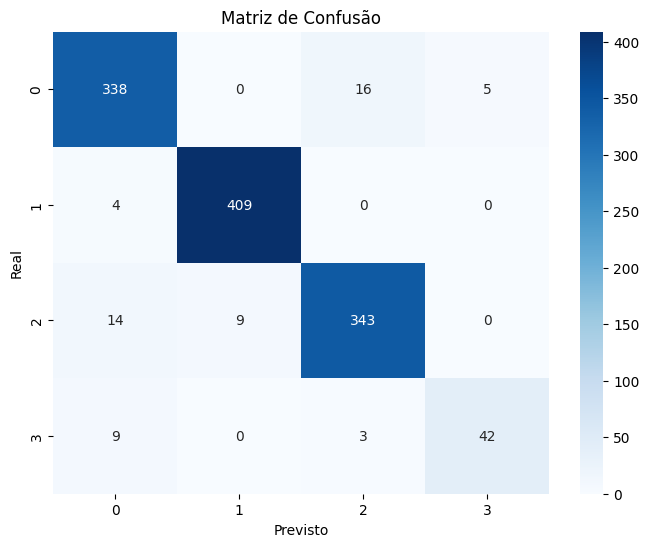

In [9]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

**Histograma das Classes:**

Nesta etapa, visualizamos o histograma das classes, que representa a distribuição dos tipos de exoplanetas no conjunto de dados. Cada barra corresponde a um tipo de planeta, e a altura da barra indica o número de instâncias desse tipo. Isso nos fornece insights sobre a distribuição relativa das classes, o que é importante para entender o desbalanceamento ou a abundância de cada categoria.


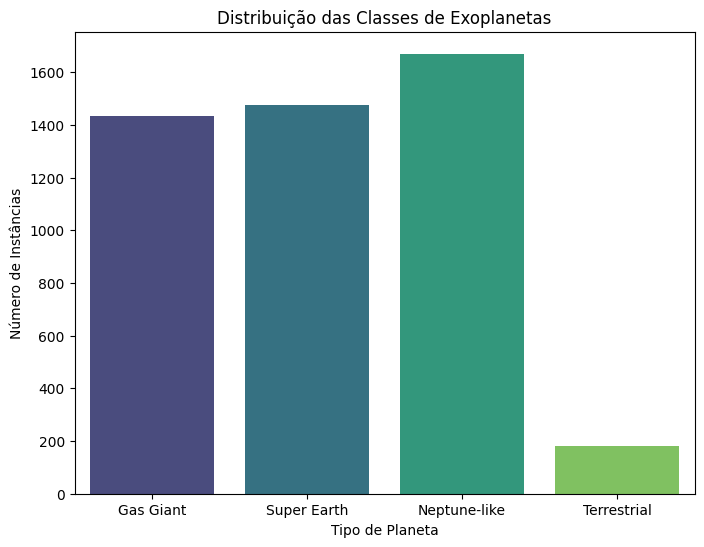

In [10]:
# Histograma das classes
plt.figure(figsize=(8, 6))
sns.countplot(x='planet_type', data=df, palette='viridis')
plt.title('Distribuição das Classes de Exoplanetas')
plt.xlabel('Tipo de Planeta')
plt.ylabel('Número de Instâncias')
plt.show()

**Gráfico de Dispersão para Características Importantes:**

Esta etapa inclui um gráfico de dispersão que destaca a relação entre características importantes para diferentes tipos de exoplanetas. O uso de cores distintas representa diferentes tipos de exoplanetas, facilitando a identificação de padrões ou agrupamentos nas relações entre as variáveis.


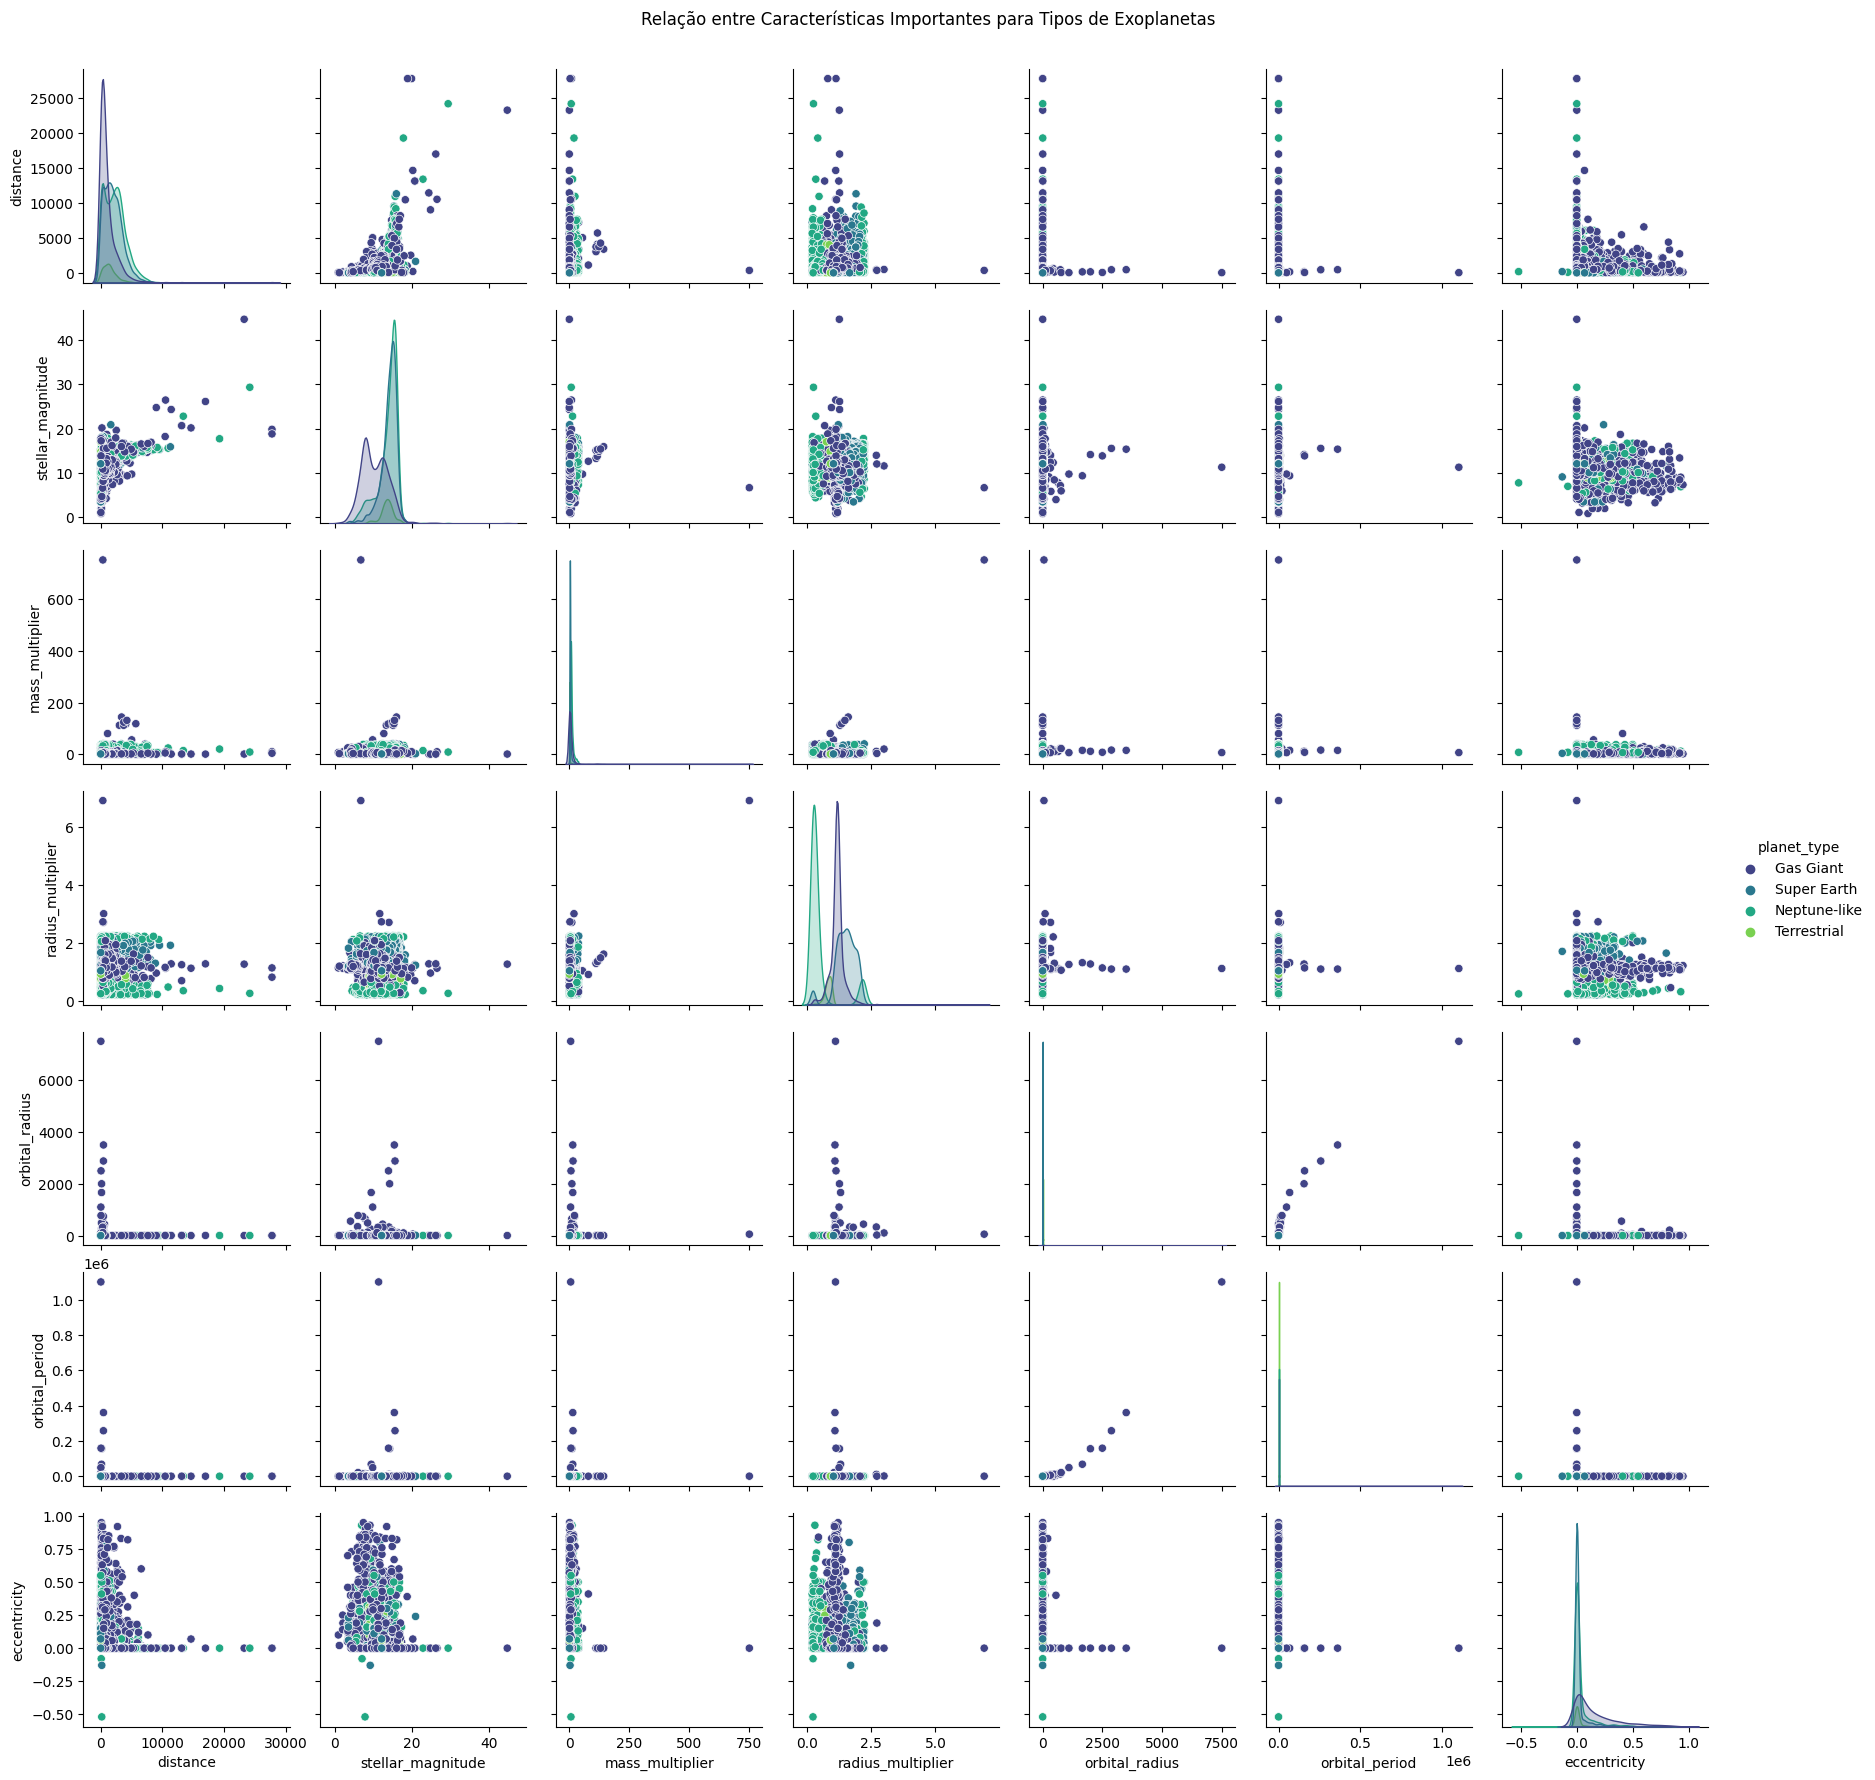

In [11]:
# Gráfico de dispersão para características importantes
sns.pairplot(df, hue='planet_type', vars=features, palette='viridis')
plt.suptitle('Relação entre Características Importantes para Tipos de Exoplanetas', y=1.02)
plt.show()